In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import pandas_profiling as pp
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('D:/Data Analysis/OTT/hulu_titles.csv')
pd.set_option('display.max_columns',None)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


In [153]:
df.shape

(3073, 12)

In [154]:
df.size

36876

In [155]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cast,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,3073.0,2012.567524,10.844069,1923.0,2010.0,2016.0,2019.0,2021.0


In [156]:
df.dtypes

show_id          object
type             object
title            object
director         object
cast            float64
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
dtype: object

In [157]:
for i in range(len(df.isna().sum())):
    if df.isna().sum()[i]>0:
        print('Total missing values in '+df.isna().sum().index[i],':',df.isna().sum()[i])

Total missing values in director : 3070
Total missing values in cast : 3073
Total missing values in country : 1453
Total missing values in date_added : 28
Total missing values in rating : 520
Total missing values in duration : 479
Total missing values in description : 4


In [158]:
df['director'].fillna('unknown',inplace=True)
df['cast'].fillna('unknown',inplace=True)
df['country'].fillna('unknown',inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0],inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)
df['duration'].fillna(df['duration'].mode()[0],inplace=True)
df['description'].fillna('unknown',inplace=True)

In [159]:
df.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [160]:
type_count=df['type'].value_counts()
type_count

TV Show    1589
Movie      1484
Name: type, dtype: int64

In [161]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [162]:
hul_rating=df['rating'].dropna().unique()
hul_rating

array(['TV-MA', 'TV-14', 'PG-13', 'R', 'PG', 'TV-PG', 'NOT RATED', 'G',
       'TV-G', '2 Seasons', 'TV-Y', '93 min', '4 Seasons', 'TV-Y7',
       '136 min', '91 min', '85 min', '98 min', '89 min', '94 min',
       '86 min', '3 Seasons', '121 min', '88 min', '101 min', '1 Season',
       '83 min', '100 min', '95 min', '92 min', '96 min', '109 min',
       '99 min', '75 min', '87 min', '67 min', '104 min', '107 min',
       '84 min', '103 min', '105 min', '119 min', '114 min', '82 min',
       '90 min', '130 min', '110 min', '80 min', '6 Seasons', '97 min',
       '111 min', '81 min', '49 min', '45 min', '41 min', '73 min',
       '40 min', '36 min', '39 min', '34 min', '47 min', '65 min',
       '37 min', '78 min', '102 min', '129 min', '115 min', '112 min',
       'NR', '61 min', '106 min', '76 min', '77 min', '79 min', '157 min',
       '28 min', '64 min', '7 min', '5 min', '6 min', '127 min',
       '142 min', '108 min', '57 min', '118 min', '116 min', '12 Seasons',
       '71 min']

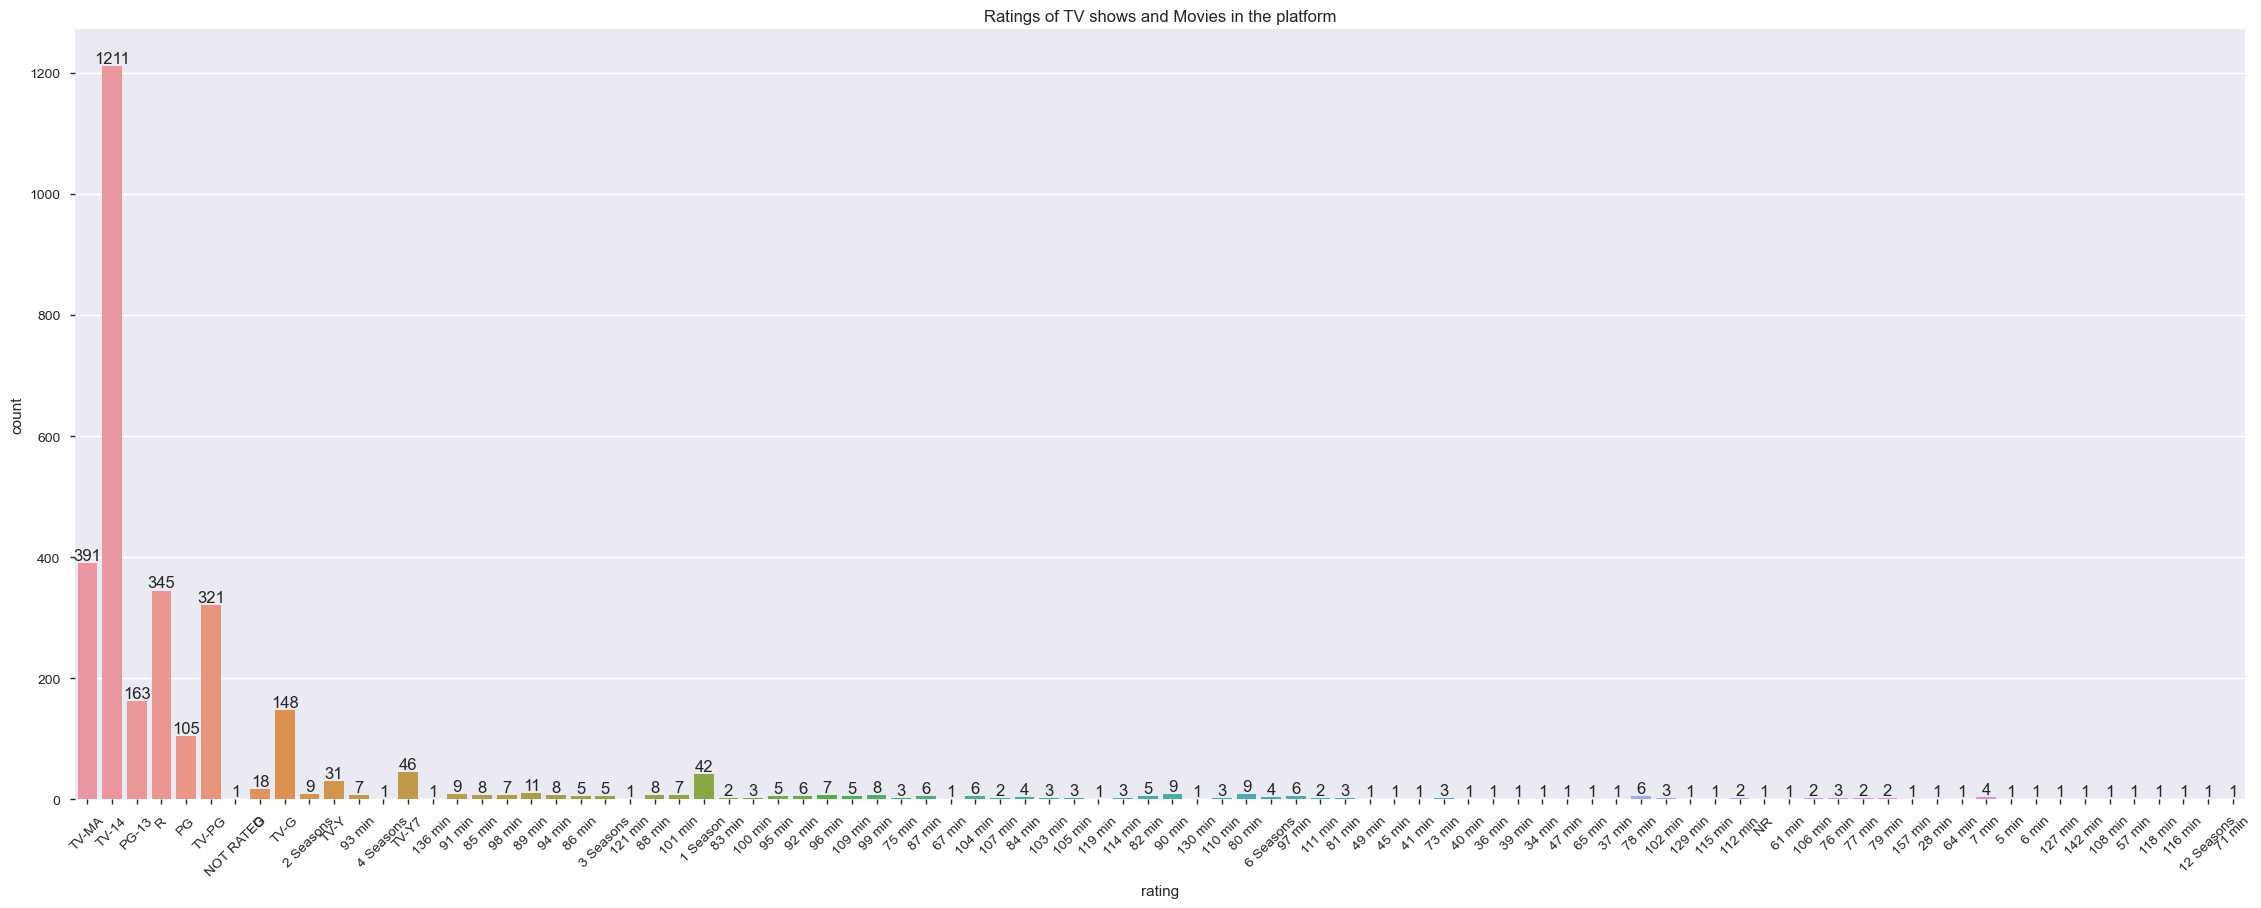

In [163]:
plt.figure(figsize=(28,10))
plt.title('Ratings of TV shows and Movies in the platform')
c=sns.countplot(data=df,x='rating')
c.bar_label(c.containers[0],size=12)
plt.xticks(rotation=45)
plt.show()

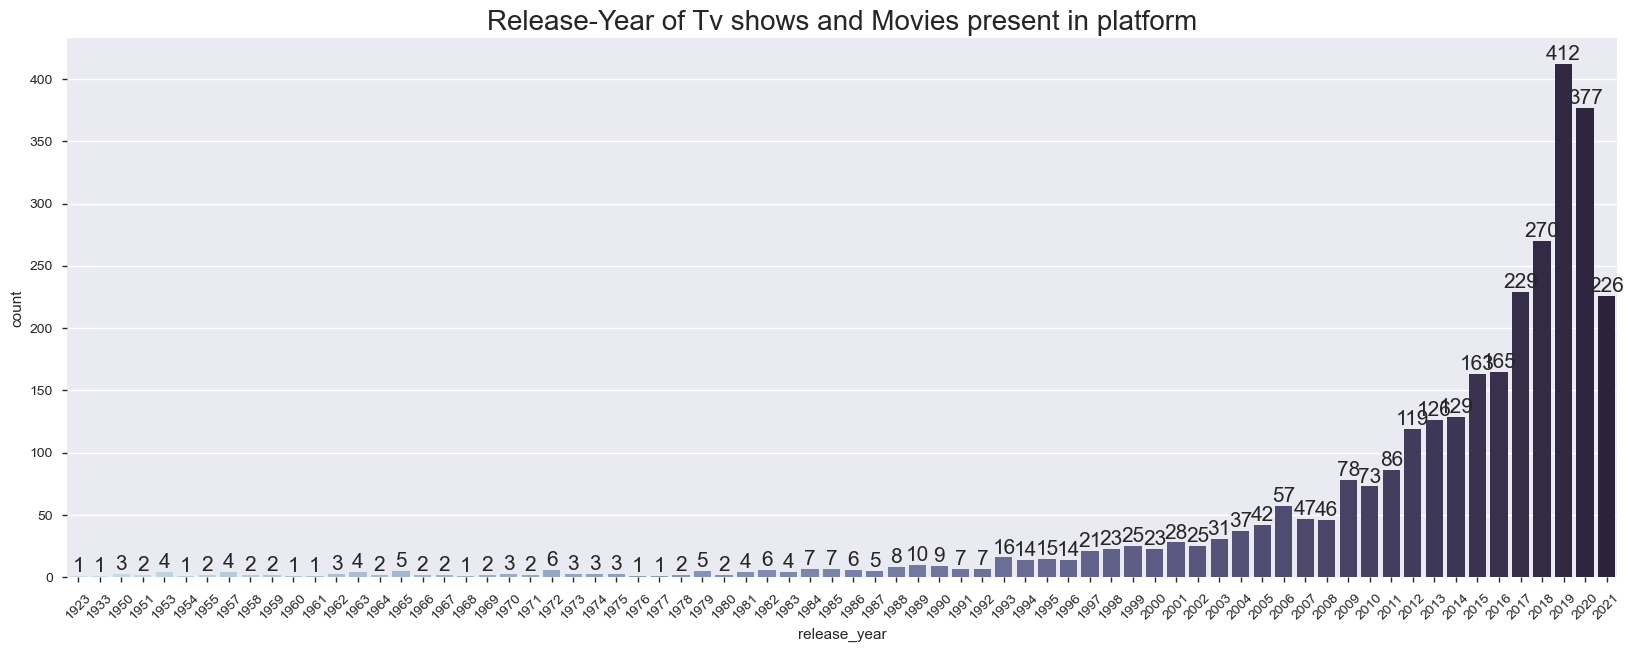

In [164]:
plt.figure(figsize=(20,7))
plt.title('Release-Year of Tv shows and Movies present in platform',fontsize=20)
c=sns.countplot(data=df,x='release_year',palette="ch:s=.25,rot=-.25")
c.bar_label(c.containers[0],size=15)
plt.xticks(rotation=45)
plt.show()

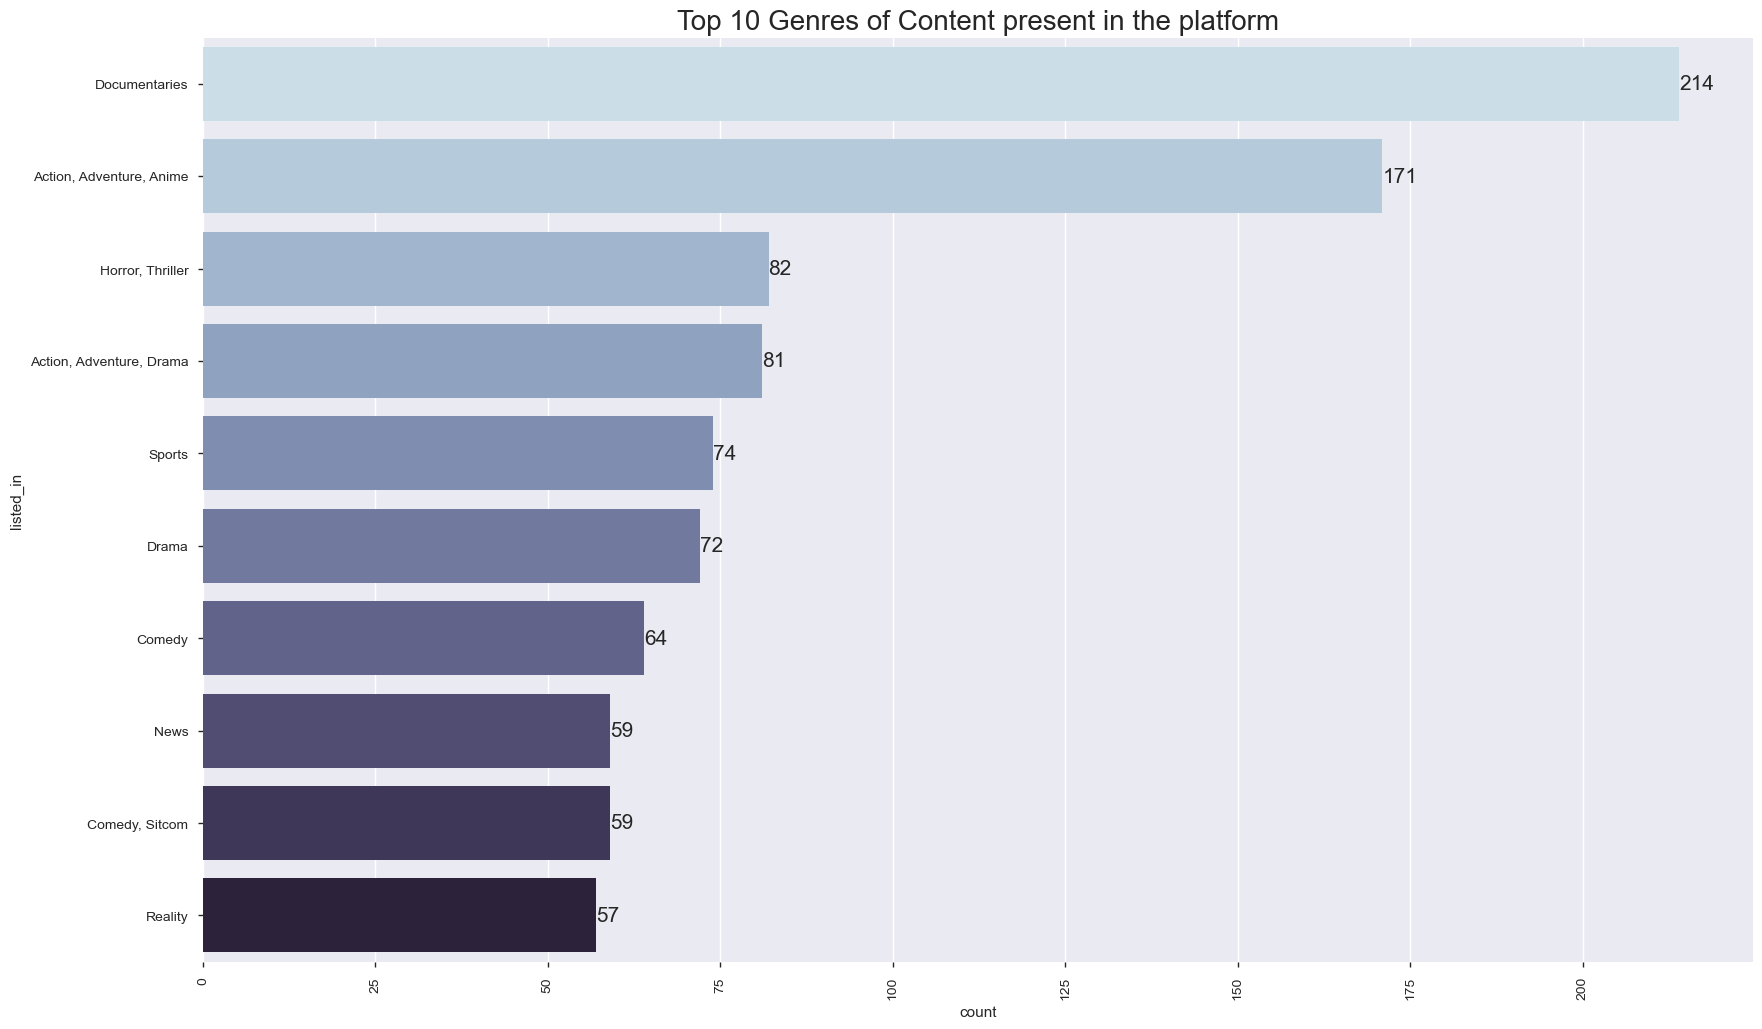

In [165]:
plt.figure(figsize=(20, 12))
plt.title("Top 10 Genres of Content present in the platform",fontsize=20)
c=sns.countplot(y='listed_in',data=df,palette="ch:s=.25,rot=-.25",order=df.listed_in.value_counts().iloc[:10].index)
c.bar_label(c.containers[0],size = 15)
plt.xticks(rotation=90)
plt.show()

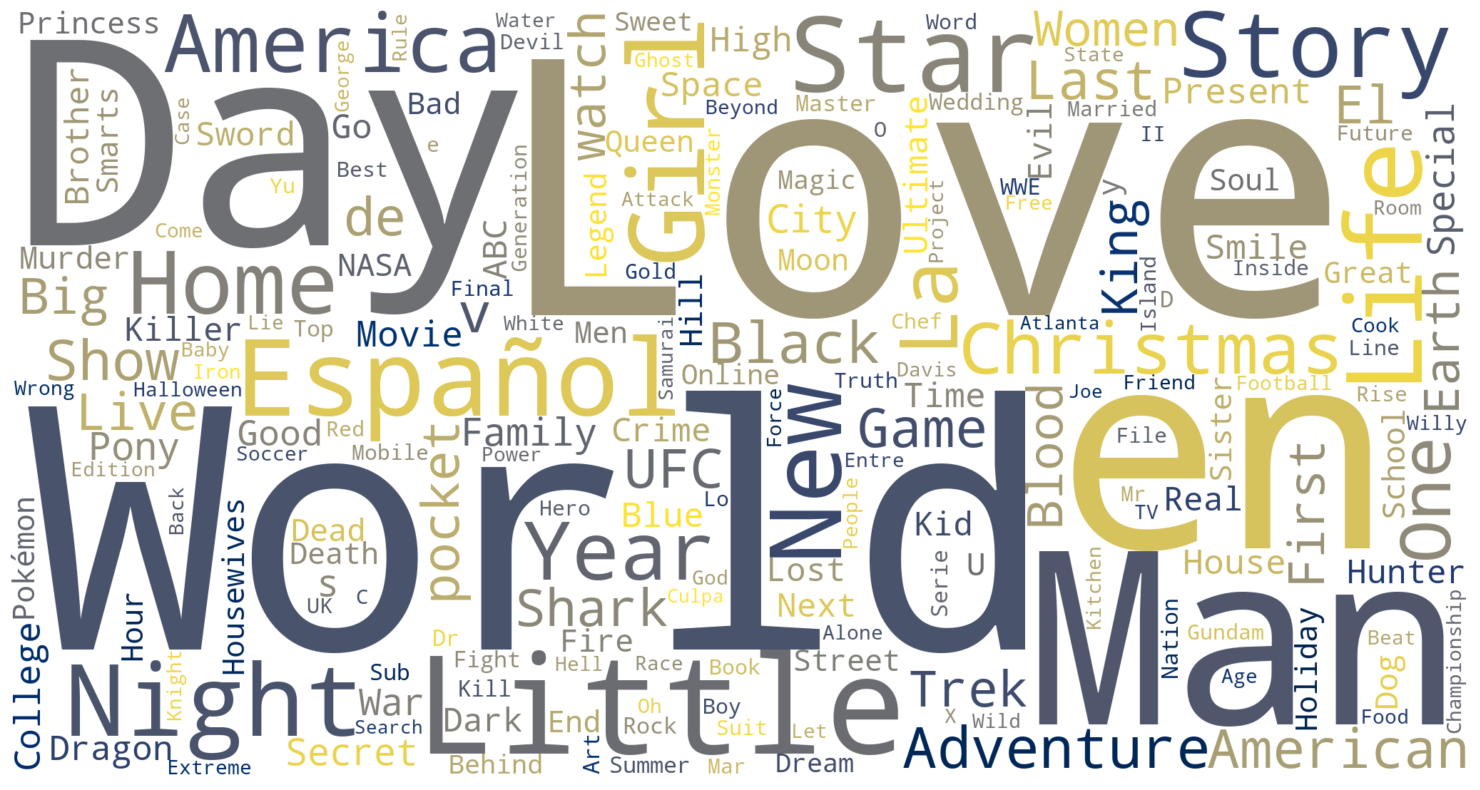

In [167]:
txt1 = " ".join(title for title in df.title)
word_cloud1 = WordCloud(collocations = False, background_color = 'white',width = 2048, height = 1080,colormap='cividis').generate(txt1)
plt.figure(figsize=(30,10))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [168]:
Profile_report = pp.ProfileReport(df,title='Disney data')
Profile_report.to_notebook_iframe()